## Вспоминаем парсинг сайтов

Бьютифул суп парсит html документы за нас, обращаясь к их древовидной структуре.



In [ ]:
from bs4 import BeautifulSoup
import urllib.request

r = urllib.request.urlopen("http://lenta.ru") #сюда получаем ответ, 200, код ответа
content = r.read() 

html = content.decode("utf-8")
soup = BeautifulSoup(html, 'lxml')

for p_res in soup.find_all('p'): #например, интересует тег <p>
    line = p_res.get_text()

Допустим, нужен нам такой тег:
```
<p class="text_article"> ADLCKE </p>
```
А есть еще такой тег
```
<p class="credits"> Все права защищены </p>
```
Только в старых сайтах классы могут быть одинаковыми. С современными сайтами, написанными
знающими людьми, такое не происходит.

Что делать, чтобы find_all в супе нашел то, что нам надо

In [ ]:
for p_res in soup.find_all("p", class_="text_article"): #например, интересует тег <p>
    line = p_res.get_text()
    

## Pandas

Предполагалось сделать похожий на R для питона.

Идея пандаса: мы получаем многомерную матрицу и можем ее использовать. Удобный инструмент
для работы с данными.

Можно создать таблицу, а можно импортировать.

Часто используют именно в ноутбуке

In [2]:
import pandas as pd
columns = ['first', 'second']
df = pd.DataFrame(columns=columns)

Создаем и читаем файл 

In [4]:
with open("data.tsv", "w") as f:
    f.write("\t".join(["1", "2", "3", "4"]))
    f.write("\n")
    f.write("\t".join(["5", "6", "7", "8"]))
    f.write("\n")
df2 = pd.read_csv('data.tsv', sep="\t", names=['first', 'second','third', 'forth']) #можно задать сепаратор и имена колонок
df2.head()

,first,second,third,forth
0,1,2,3,4
1,5,6,7,8


Если хотим что-то найти
```
df2.loc[index, name of column]
```

In [5]:
df2.loc[1, 'first']

5

Перезаписать значение ячейки

In [6]:
df2.loc[1, 'first'] = '9'
#хотим увидеть значение ячейки
for index, row in df2.iterrows():
    cell = row['first']
    cell2 = row['second']

In [7]:
cell

'9'

In [8]:
cell2

6

Специальный бинарный формат – pickle

In [ ]:
df2.to_pickle('dataframe.pkl') #превращаем в формат пикл
df2 = pd.read_pickle("dataframe.pkl") #обратно возвращаем

In [17]:
# обходим датафрейм
# если найдем такую последовательность символов, она будет уничтожена
for i in df2.index:
    df2.loc[i, "first"] = df2.loc[i, "first"].replace("abc", "") 
    
# найти среднее значение чисел, медиану
df2["second"].mean()
df2["second"].median()
# 
# #максимальное - минимальное значение
df2["second"].max()
df2["second"].min()

#хотим узнать все, что там написано, все значения в строке
df2.loc[df2["second"] == df2["second"].max()]

2

In [ ]:
#сделать список уникальных строк 

a = pd.unique(df[["first"]].values.ravel("k"))

## NumPy
Умеет всякое считать, например, коэффициент корреляции

In [18]:
import numpy
numpy.corrcoef(df2['first'], df2['second'])


TypeError: unsupported operand type(s) for +: 'int' and 'str'

Когда и как стоит использовать groupby: если у нас разные данные, и мы собираем их по колонкам

In [20]:
df = pd.DataFrame({"count": [23, 342, 46, 42], "words": ["word1", "word2", "word3", "word4"]})

df1 = df.groupby("words")["count"].sum().to_frame().reset_index().sort_values(by="count")
df1 #идем в words, ищем уникальные значения, суммируем соответствующие им в колонке count

,words,count
0,word1,23
3,word4,42
2,word3,46
1,word2,342


reset_index нужен, чтобы сбросить индекс и во втором фрейме свои индексы были

In [21]:
df2 = df.groupby("words").size() #размер
df2

words
word1    1
word2    1
word3    1
word4    1
dtype: int64

## MatPlotLib

Используется для создания изображений и графиков

pip3 install matplotlib

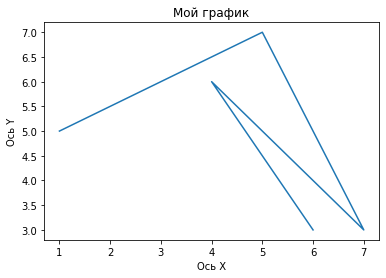

In [25]:
import matplotlib.pyplot as plt
X = [1, 5, 7, 4, 6]
Y = [5, 7, 3, 6, 3]
plt.title("Мой график")
plt.plot(X,Y)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.show()

Если нужно сохранить это в файл (он сам подберет способ, как)

In [ ]:
plt.savefig("plot.jpg")


1. Берем 100 записей сообщества
2. Скачиваем текст, сливаем в 1 кучу
3. Делим на отрезки по 100 слов
4. Строим график для самых частотных слов